In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
data = pd.read_csv('Cirhossis Dataset.csv')
data

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

In [25]:
data.describe()

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   41.250000    871.500000   80.600000      84.250000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  407.000000   416.000000  412.000000  
mean   257.024570    10.731731    3.024272  
std     98.325585     1.022000    0.882042  
min     62.000000     9.000000    1.000000  
25%    188.500000    10.000000    2.000000  
50%    251.000000    10.600000    3.000000  
75%    318.000000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [27]:
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [28]:
data = data.dropna(subset=['Drug'])

In [29]:
#CEK DATA NULL
data.isnull().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [30]:
lii = list(data["Status"])
lii

['D',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'CL',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C'

In [31]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [32]:
data["status"] = status

C:\Users\user\AppData\Local\Temp\ipykernel_7700\4076641236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["status"] = status


In [33]:
data = data.drop(["status"], axis=1)

In [34]:
data["Age"] = (data["Age"].values/365).round()
data.head()

ID  N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2   3    1012      D  D-penicillamine  70.0   M       N            N       N   
3   4    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4   5    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [35]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [37]:
data.describe().transpose().style.background_gradient(cmap = 'GnBu' )

In [40]:
#statistika dasar
data.describe()

ID       N_Days         Age   Bilirubin  Cholesterol  \
count  312.000000   312.000000  312.000000  312.000000   284.000000   
mean   156.500000  2006.362179   50.060897    3.256090   369.510563   
std     90.210864  1123.280843   10.578423    4.530315   231.944545   
min      1.000000    41.000000   26.000000    0.300000   120.000000   
25%     78.750000  1191.000000   42.000000    0.800000   249.500000   
50%    156.500000  1839.500000   50.000000    1.350000   309.500000   
75%    234.250000  2697.250000   57.000000    3.425000   400.000000   
max    312.000000  4556.000000   78.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  312.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.520000   97.648387   1982.655769  122.556346     124.702128   
std      0.419892   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.310000   41.250000    871.500000   80.600000      84.250000   
50%      3.550000   73.000000   1259.000000  114.700000     108.000000   
75%      3.800000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  308.000000   312.000000  312.000000  
mean   261.935065    10.725641    3.032051  
std     95.608742     1.004323    0.877880  
min     62.000000     9.000000    1.000000  
25%    199.750000    10.000000    2.000000  
50%    257.000000    10.600000    3.000000  
75%    322.500000    11.100000    4.000000  
max    563.000000    17.100000    4.000000

In [42]:
#checking skewness dari data
cirrosis_true_count =len(data.loc[data['Status']==1])
cirrosis_false_count = len(data.loc[data['Status']==0])

In [44]:
(cirrosis_true_count,cirrosis_false_count)

(0, 0)

In [45]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 312
total number of columns : 20


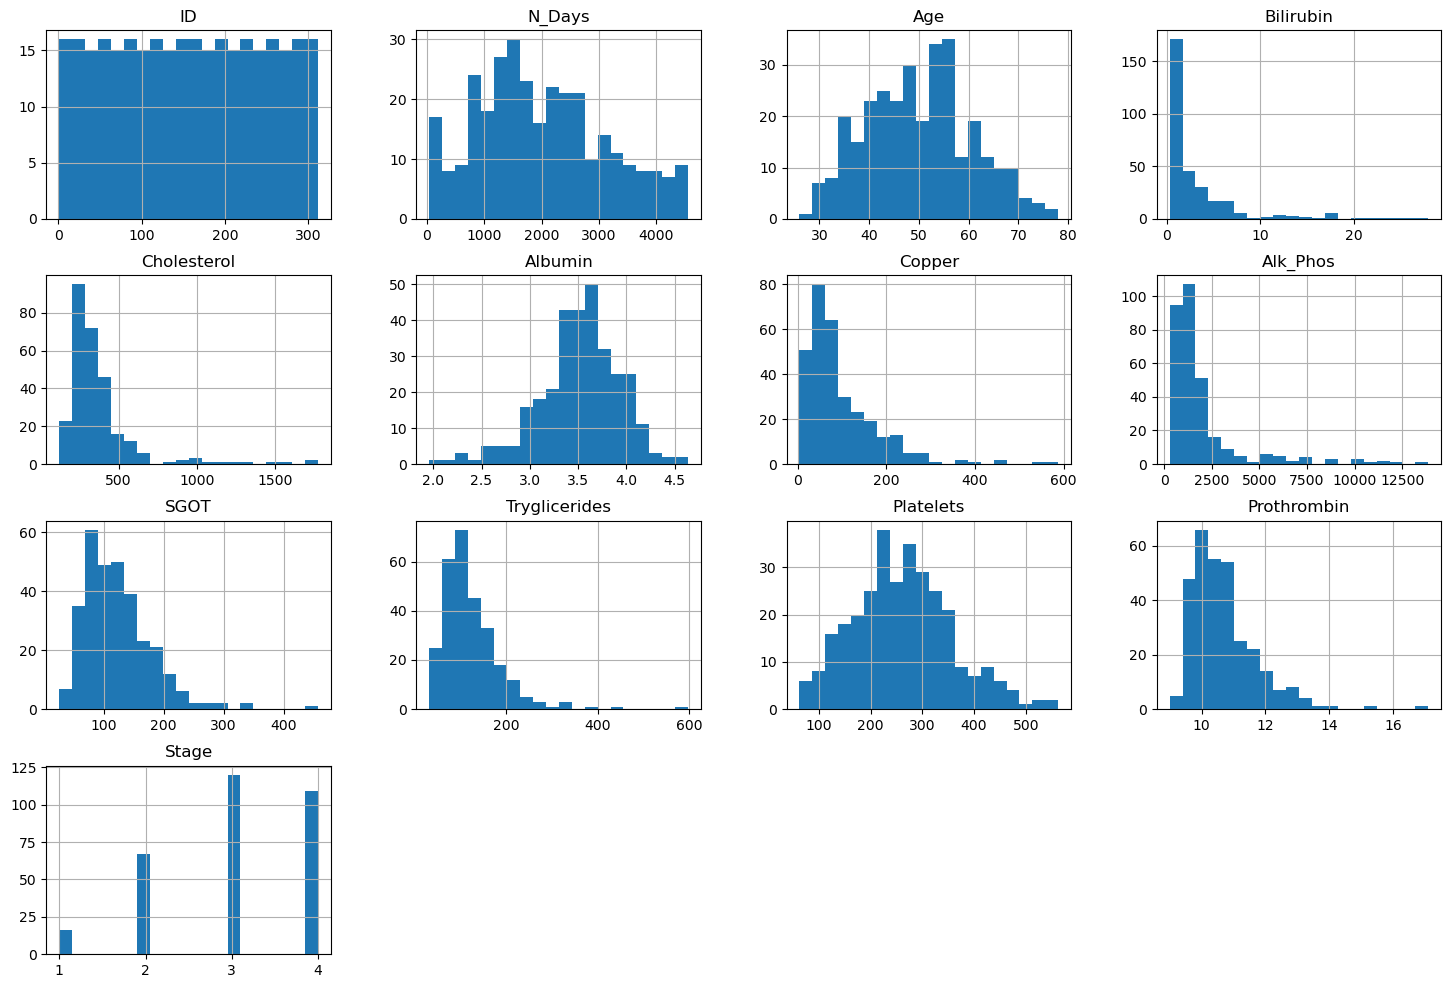

In [46]:
data.hist(bins=20, figsize=(18,12))
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_7700\1747429807.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


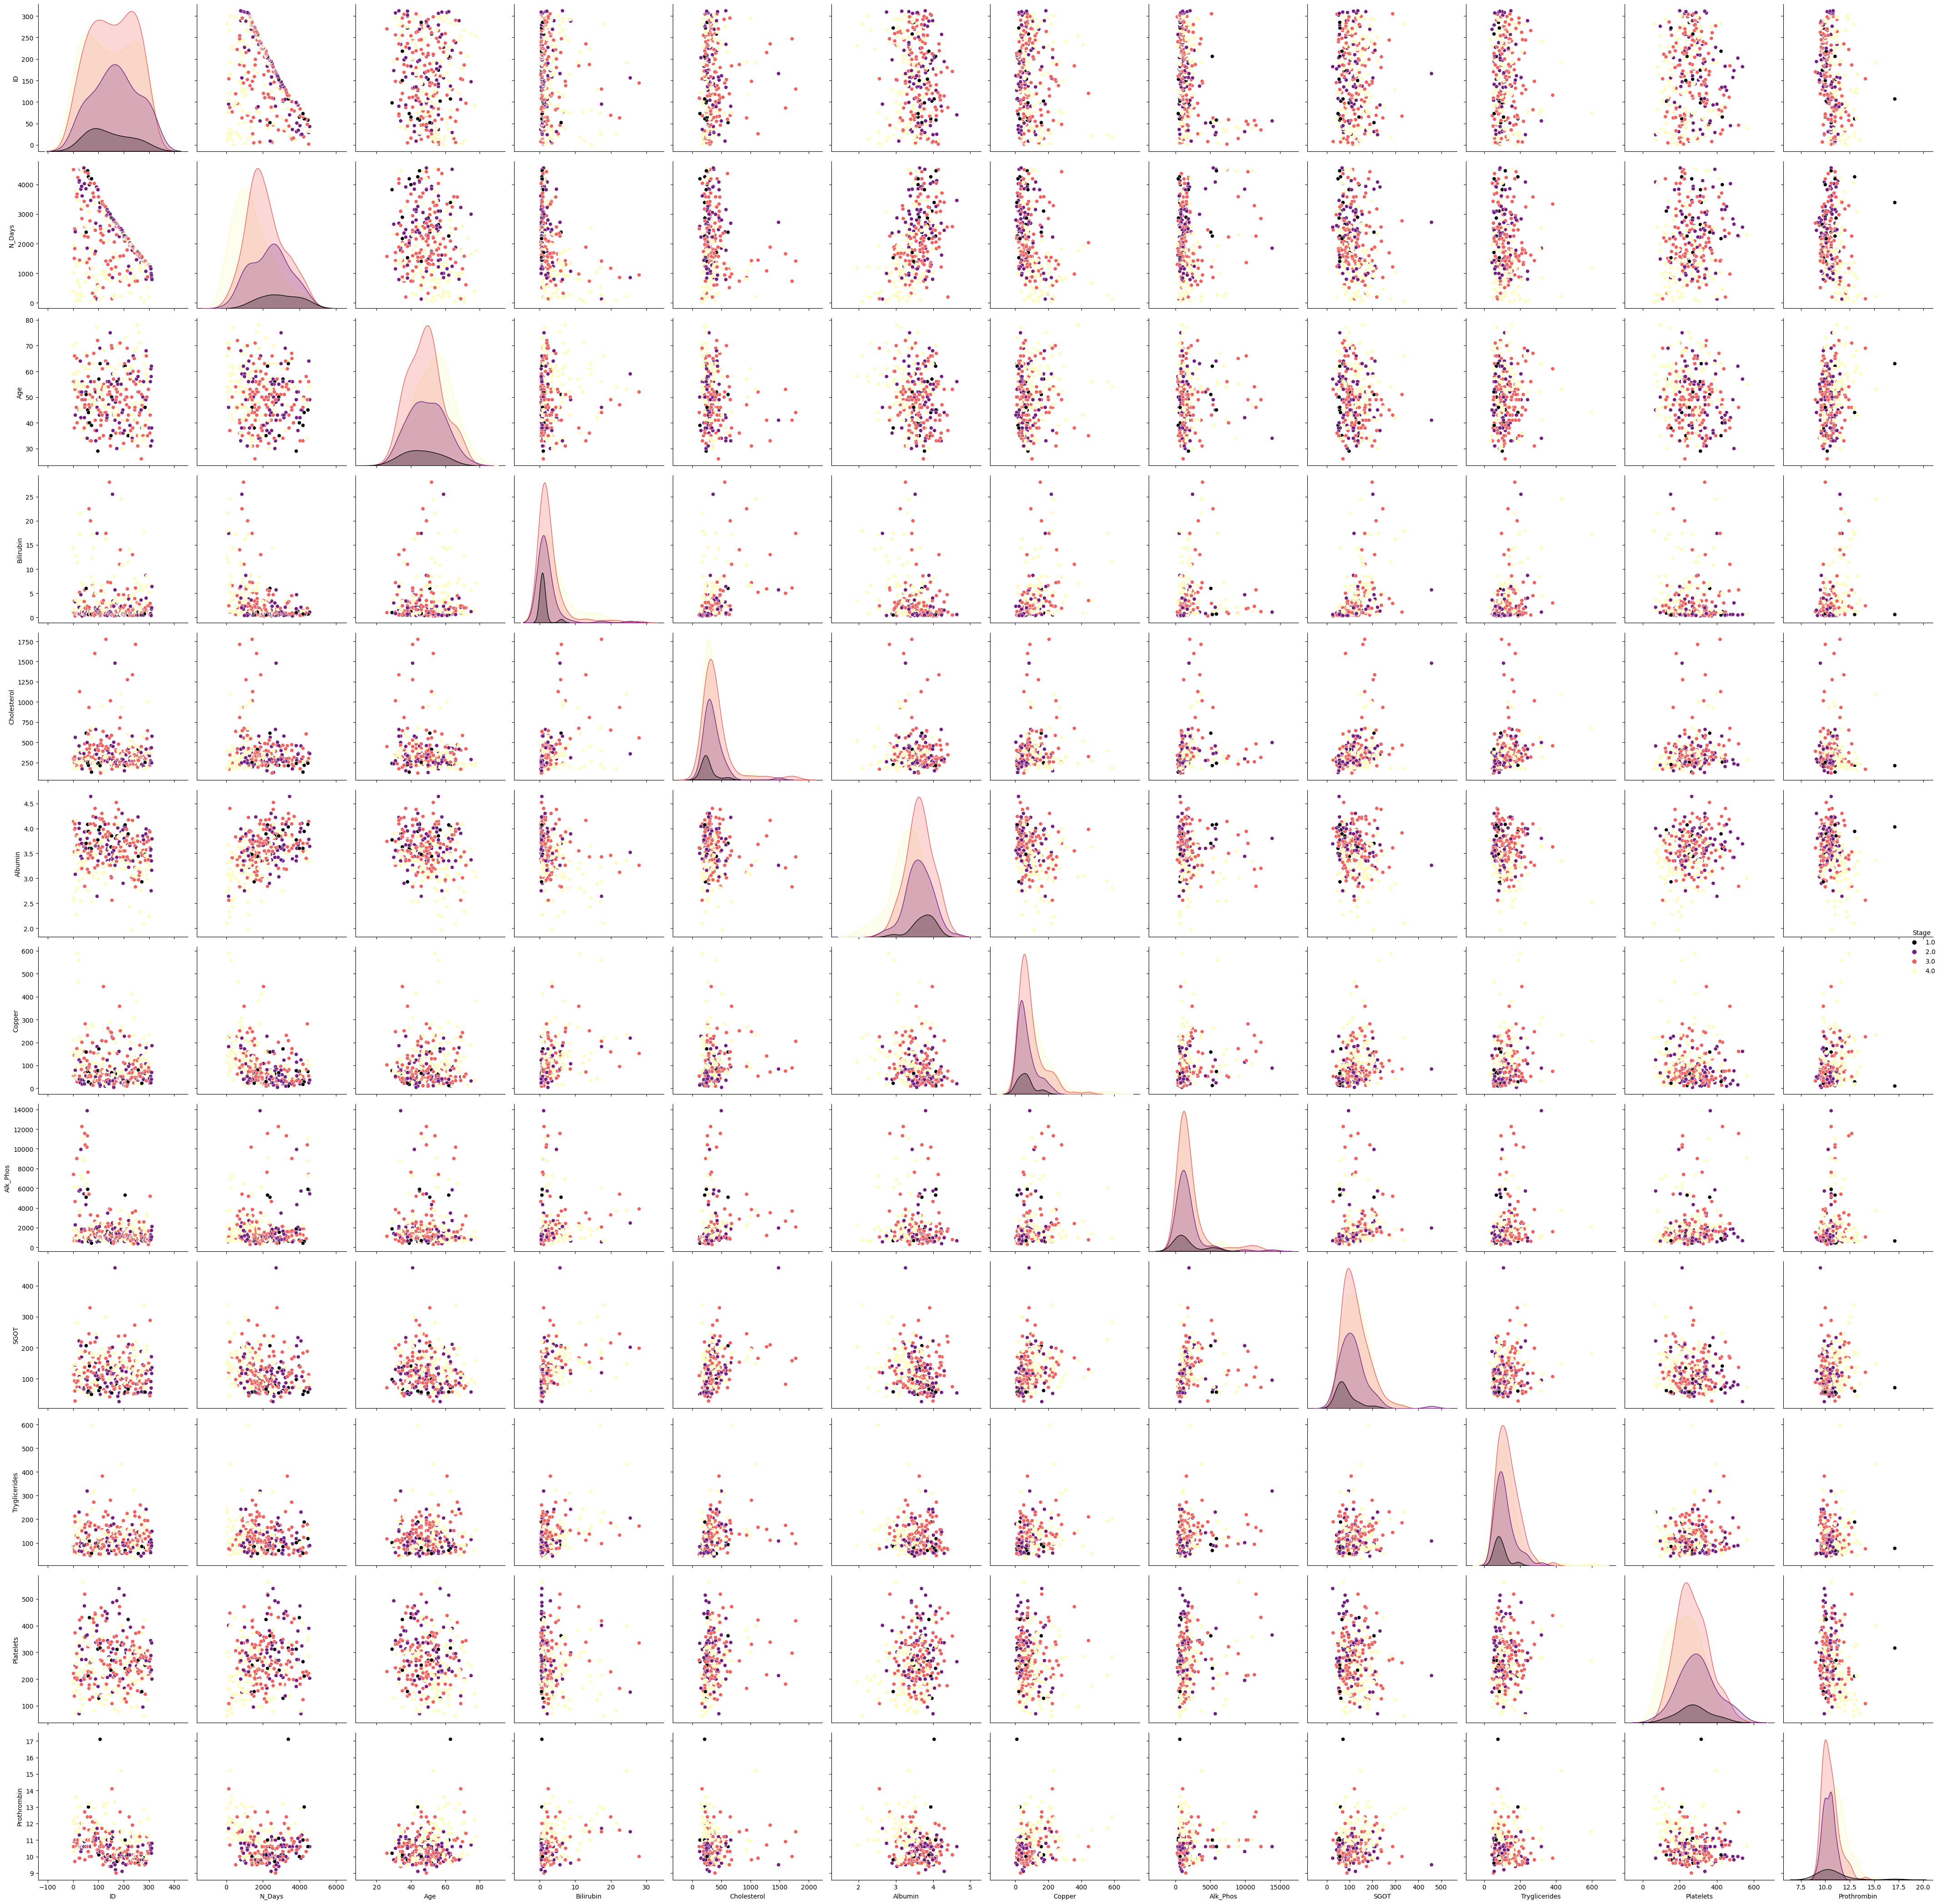

In [47]:
#make pairplot
sns.pairplot(data,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

In [48]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
     

In [51]:
import pickle

pickle.dump(data,open('forest.pkl','wb'))